# Game of Thrones 

**Game of Thrones** is an American *fantasy drama* television series created by **David Benioff** and **D.B. Weiss**. 

The series is based on **George R.R. Martin**'s series of fantasy novels, *A Song of Ice and Fire*. 

The series takes place in the fictional continents of *Westeros* and *Essos*, and chronicles the power struggles among noble families as they fight for control of the *Iron Throne* of the Seven Kingdoms.$^1$

1. Source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes)

![Game of Thrones Logo](img/Game_of_Thrones_2011_logo.svg.png "Game of Thrones Logo")

## Series Statistics 

### Average viewership per season

Average viewership for each season in the U.S. (in milions)

In [40]:
import pandas as pd
data = pd.read_csv("data/data.csv")
data.groupby("Season").agg(**
    {"Average viewership": ("U.S. Viewers", "mean")}
).round(2)

,Average viewership
Season,
1,2.52
2,3.80
3,4.97
4,6.85
5,6.88
6,7.69
7,10.26
8,11.99


We can see that for each season the viewership has increased

### Minimum and Maximum vievership numbers

In [38]:
print("Maximum number of viewers: {} milion (season {}, episode {})\nMinimum number of viewers: {} milion (season {}, episode {})".format(
    data["U.S. Viewers"].max(), 
    data.iloc[data["U.S. Viewers"].idxmax()]["Season"],
    data.iloc[data["U.S. Viewers"].idxmax()]["Episode number"],
    data["U.S. Viewers"].min(), 
    data.iloc[data["U.S. Viewers"].idxmin()]["Season"],
    data.iloc[data["U.S. Viewers"].idxmin()]["Episode number"],
))

Maximum number of viewers: 13.61 milion (season 8, episode 6)
Minimum number of viewers: 2.2 milion (season 1, episode 2)


In [60]:
diff = data["U.S. Viewers"].max() - data["U.S. Viewers"].min()
print(diff)

11.41


We can see that the viewership difference between most and least watched episodes was **11.41** milion

## Viewership Analysis

### Overall viewership throughout the series

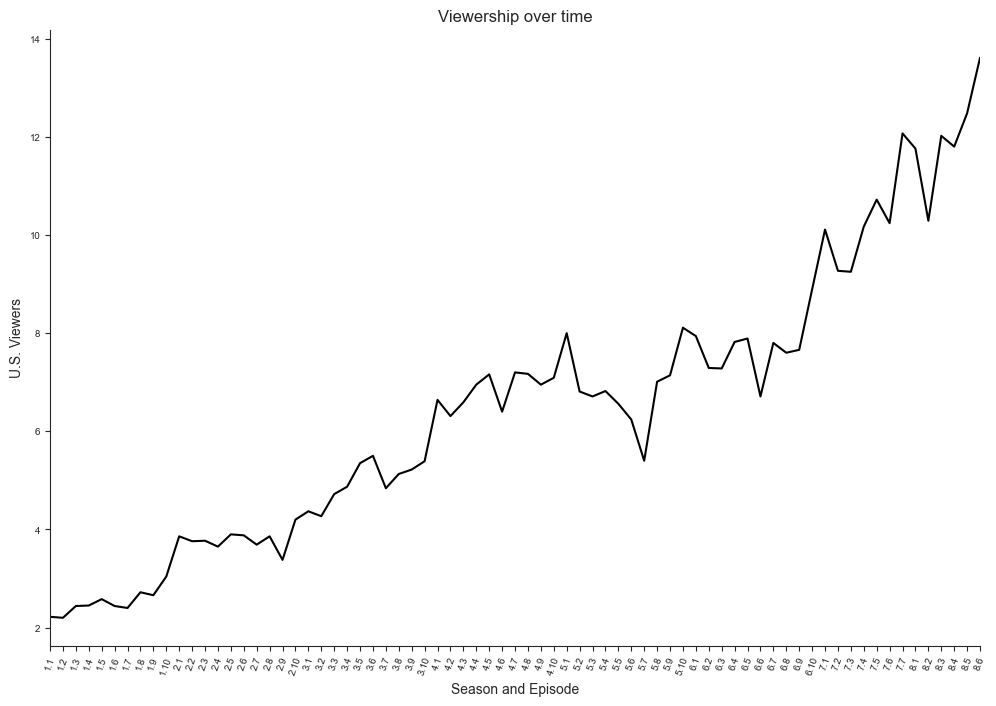

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(12,8))
data["ep"] = data["Season"].astype("str") + "." + data["Episode number"].astype("str")
sns.lineplot(data=data, x="ep", y="U.S. Viewers", ax=ax, color="black")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7, rotation=70)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
ax.set_xlim(ax.get_xticks()[0], ax.get_xticks()[-1])
ax.set_xlabel("Season and Episode")
ax.set_title("Viewership over time")
sns.despine()
plt.show()

### Viewership changes between episodes

In [45]:
data['Viewership change'] = data['U.S. Viewers'] - data['U.S. Viewers'].shift(-1)

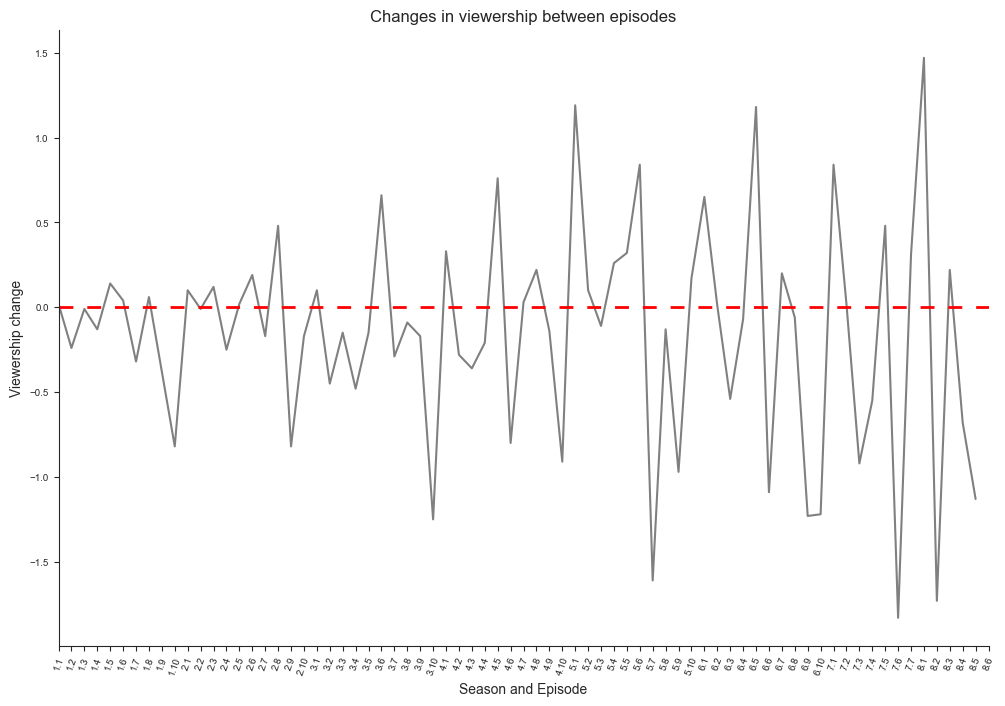

In [58]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=data, x="ep", y="Viewership change", ax=ax, color="gray")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7, rotation=70)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
plt.axhline(y=0, color='red', linestyle=(0, (5, 5)), linewidth=2)
ax.set_xlim(ax.get_xticks()[0], ax.get_xticks()[-1])
ax.set_xlabel("Season and Episode")
ax.set_title("Changes in viewership between episodes")
sns.despine()
plt.show()